# gatorAI Summer Camp 2024

In this first notebook, we're going to use Python to create a deep learning model that can take images of faces and output the emotion being expressed. 

The dataset we're going to use is the FER-2013 dataset, which contains 35,887 grayscale images of faces. Each image is 48x48 pixels and is labeled with one of seven emotions: anger, disgust, fear, happiness, sadness, surprise, or neutral.

To build our model, we'll use the Keras deep learning library, which provides a high-level interface for building and training neural networks. We'll start by loading the dataset and exploring the images, then we'll build and train a convolutional neural network (CNN) to classify the emotions in the images.

In [5]:
# Import the necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Import the libraries for CNNs

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import the libraries for the evaluation
from sklearn.metrics import classification_report, confusion_matrix


***********************************************************************
Load data:
  - Loading the dataset from: data/emotion_images/train.
  - Using a batch size of: 32.
  - Resizing input images to: (80, 80, 1).
***********************************************************************
Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 28709 files belonging to 7 classes.
Using 5741 files for validation.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


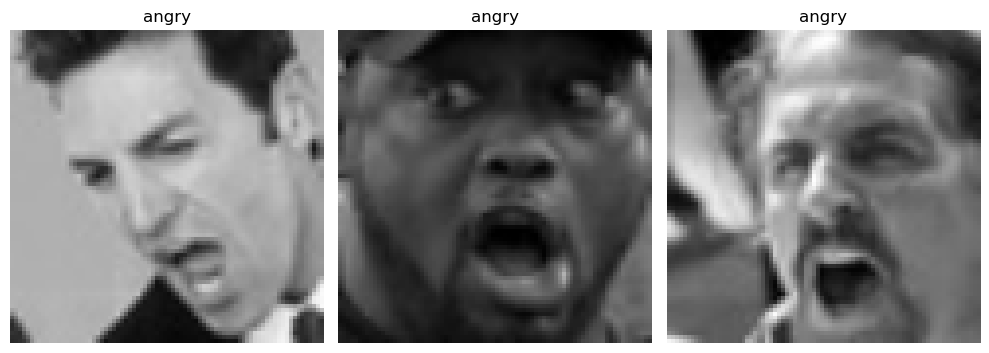

C:\Users\i.lutticken\AppData\Local\Temp\ipykernel_4388\2924638026.py:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, num_images, j + 1)


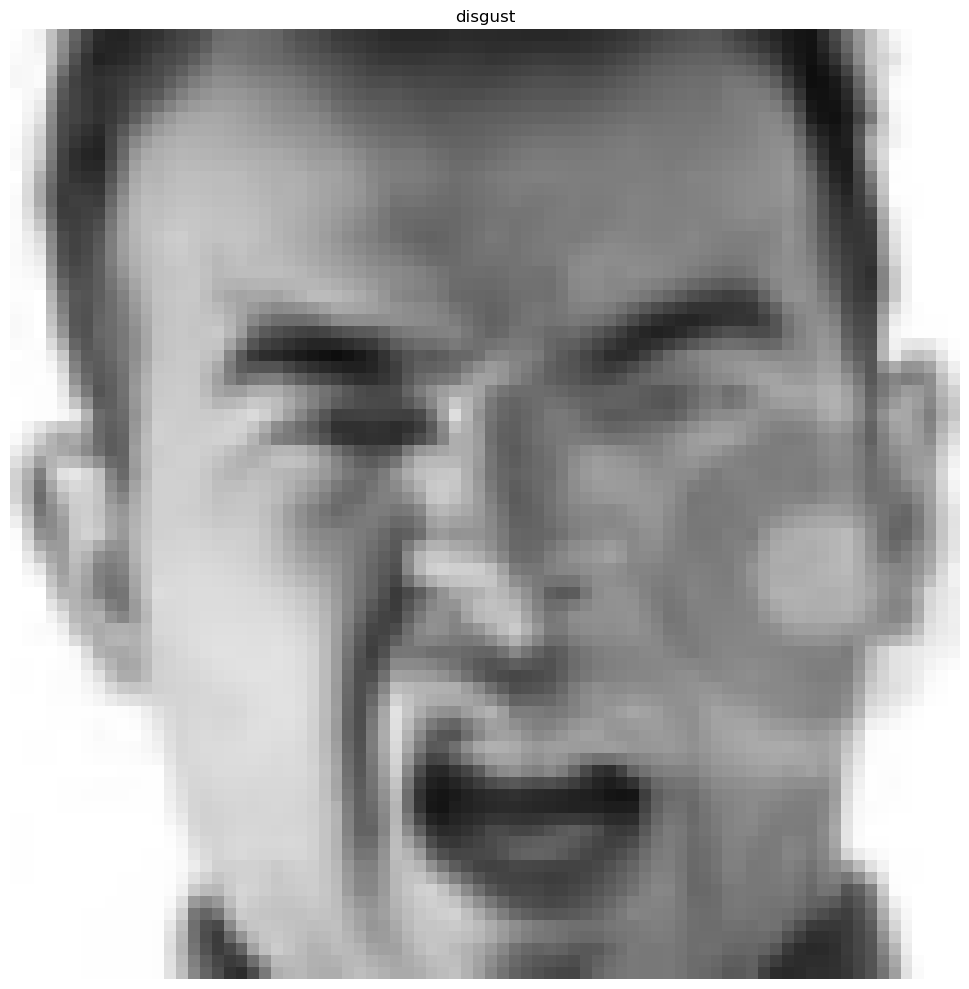

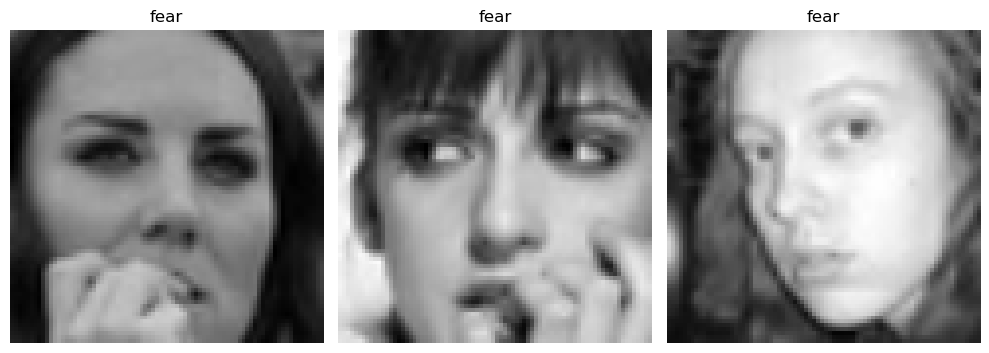

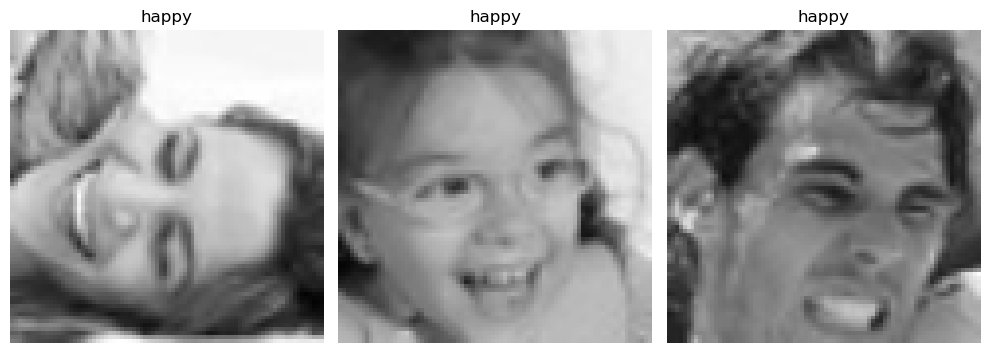

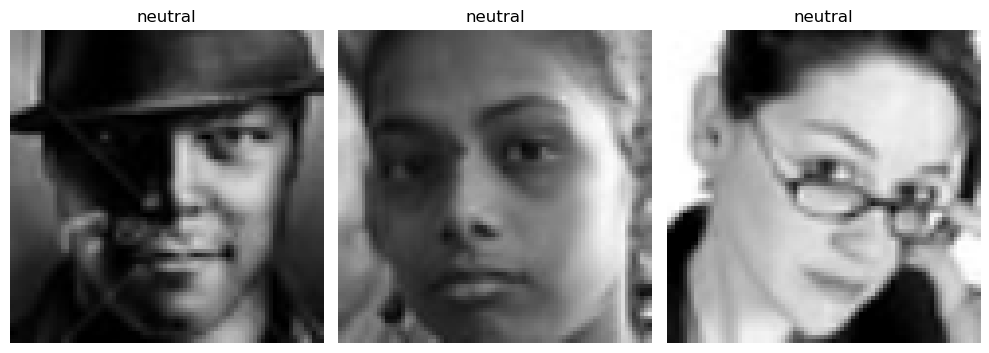

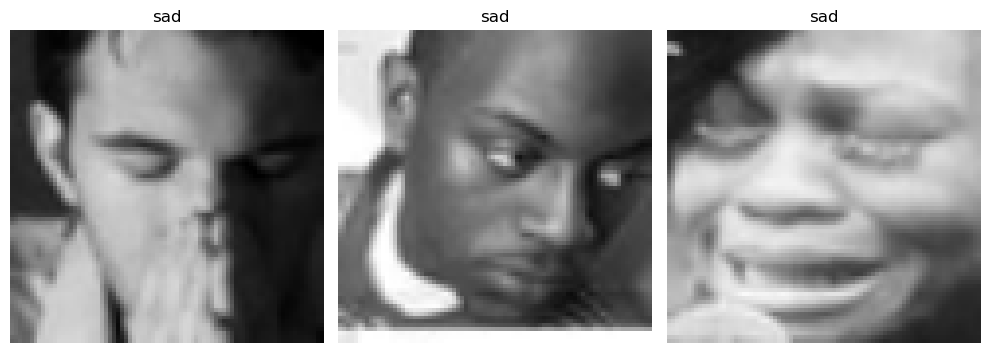

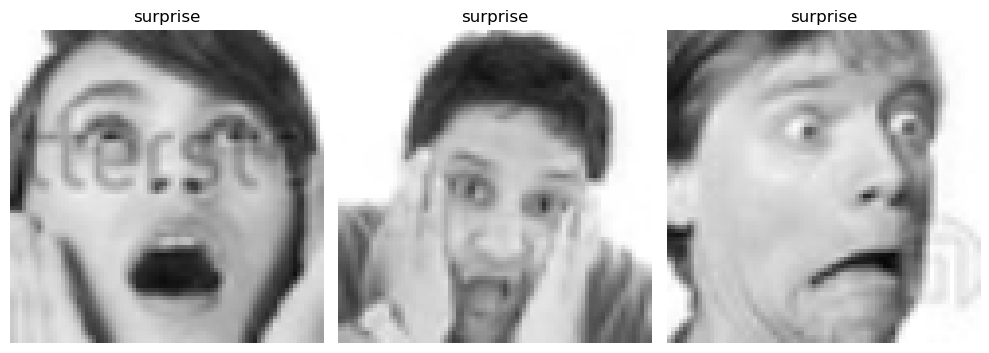

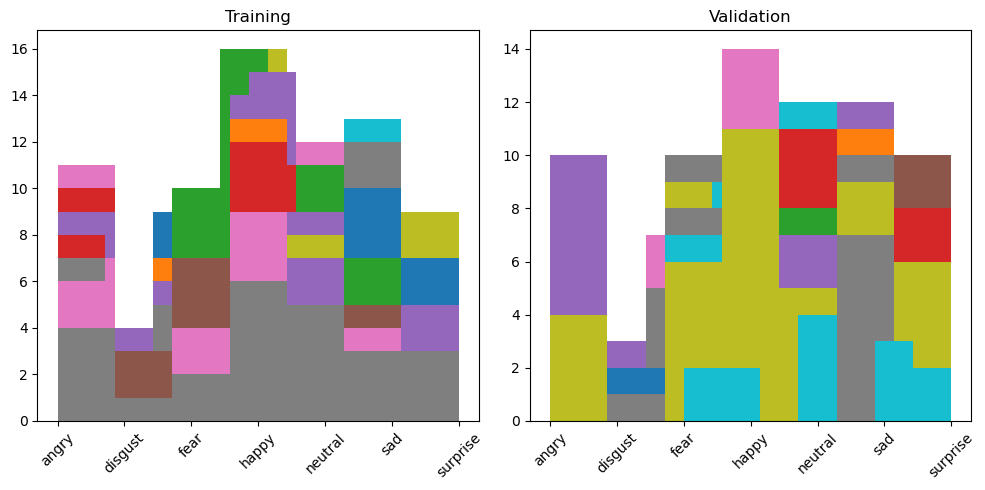

In [33]:
def load_display_data(path, batch_size=32, shape=(80,80,1), show_pictures=True, show_histogram=True):
    '''Takes a path, batch size, target shape for images and optionally whether to show sample images.
       Returns training and testing datasets
    '''
    print("***********************************************************************")
    print("Load data:")
    print(f"  - Loading the dataset from: {path}.")
    print(f"  - Using a batch size of: {batch_size}.")
    print(f"  - Resizing input images to: {shape}.")
    print("***********************************************************************")
    # Define the directory path
    directory_path = path
    
    # Define the batch size
    batch_size = batch_size
    
    # Define the image size using the 1st 2 elements of the shape parameter
    # We don't need the number of channels here, just the dimensions to use
    image_size = shape[:2]
    
    # Load the dataset
    X_train = tf.keras.preprocessing.image_dataset_from_directory(
        directory_path,
        batch_size=batch_size,
        image_size=image_size,
        validation_split=0.2,
        subset='training',
        seed=123,
        labels='inferred',
        label_mode='int'
    )
    
    X_val = tf.keras.preprocessing.image_dataset_from_directory(
        directory_path,
        batch_size=batch_size,
        image_size=image_size,
        validation_split=0.2,
        subset='validation',
        seed=123,
        labels='inferred',
        label_mode='int'
    )
    
    if show_pictures:
        # Get the class names
        class_names = X_train.class_names
        print(class_names)
    
        # Display up to 3 images from each of the categories
        for i, class_name in enumerate(class_names):

            fig, axs = plt.subplots(1, 3, figsize=(10, 10))
            fig.subplots_adjust(wspace=0, hspace=30)  # Adjust the space between subplots

            for images, labels in X_train:
                images = images.numpy()
                labels = labels.numpy()

                # Filter images of the current class
                class_images = images[labels == i]
                
                # Number of images to show.
                # Limited by number of this class in the batch or specific number
                num_images = min(len(class_images), 3)
                
                if num_images > 0:
                    for j in range(num_images):
                        ax = plt.subplot(1, num_images, j + 1)
                        plt.imshow(class_images[j].astype("uint8"))
                        plt.title(class_name)
                        plt.axis("off")
                        plt.tight_layout()
                
                    plt.show()
                    break  # Stop iterating over batches once we've found an image

    if show_histogram:
        # Display the class distribution for the entire dataset
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title("Training")
        for images, labels in X_train:
            labels = labels.numpy()
            plt.hist(labels, bins=len(class_names))
        plt.xticks(range(len(class_names)), labels=class_names, rotation=45)
        plt.subplot(1, 2, 2)
        plt.title("Validation")
        for images, labels in X_val:
            labels = labels.numpy()
            plt.hist(labels, bins=len(class_names))
        plt.xticks(range(len(class_names)), labels=class_names, rotation=45)
        plt.tight_layout()
        plt.show()


    return X_train, X_val

data_path = 'data/emotion_images/train'

X_train, X_val = load_display_data(data_path, batch_size=32, shape=(80, 80, 1), show_pictures=True, show_histogram=True)

***********************************************************************
Load data:
  - Loading the dataset from: data/emotion_images/train.
  - Using a batch size of: 32.
  - Resizing input images to: (80, 80, 1).
***********************************************************************
Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 28709 files belonging to 7 classes.
Using 5741 files for validation.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


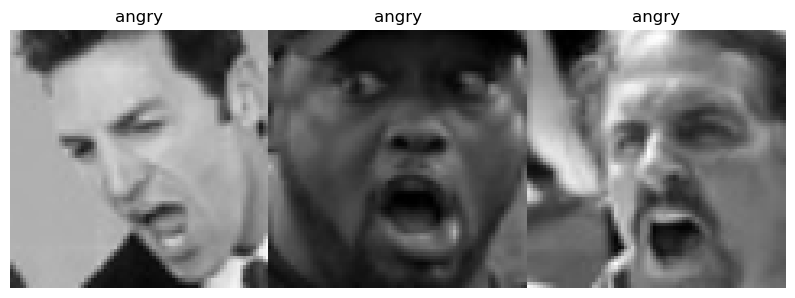

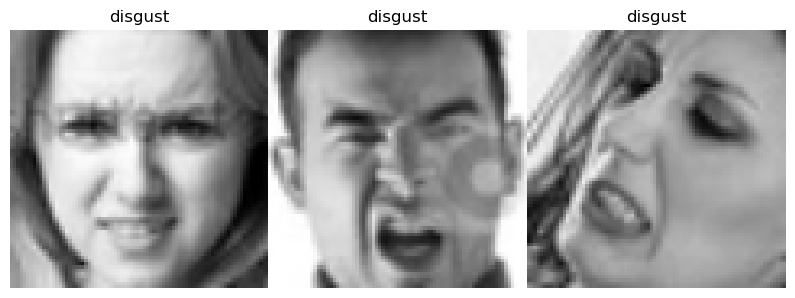

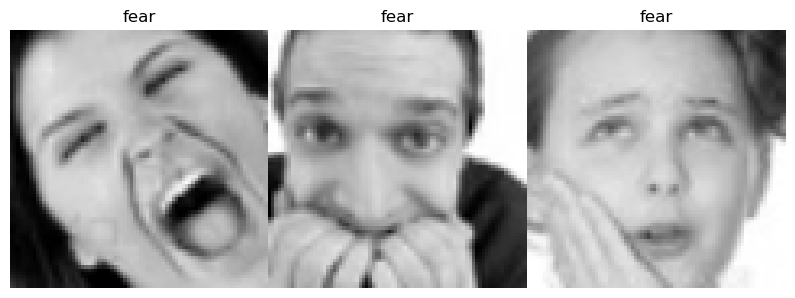

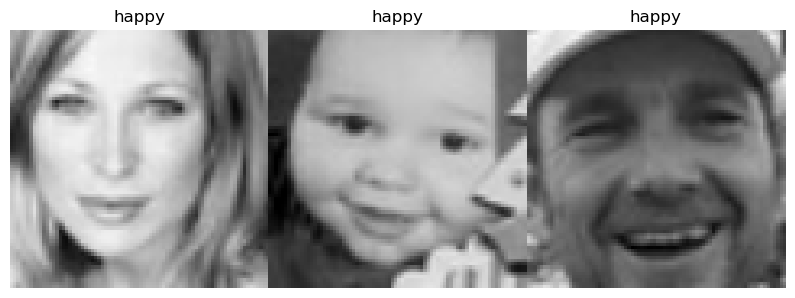

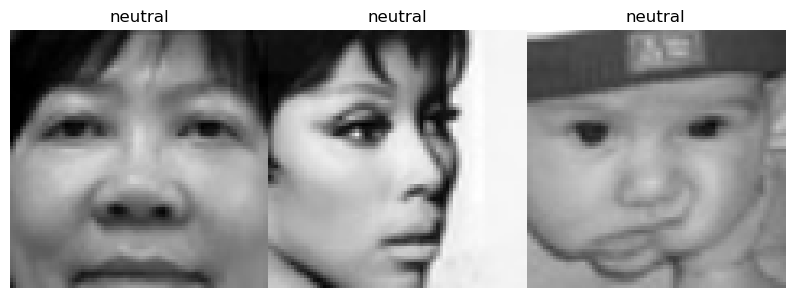

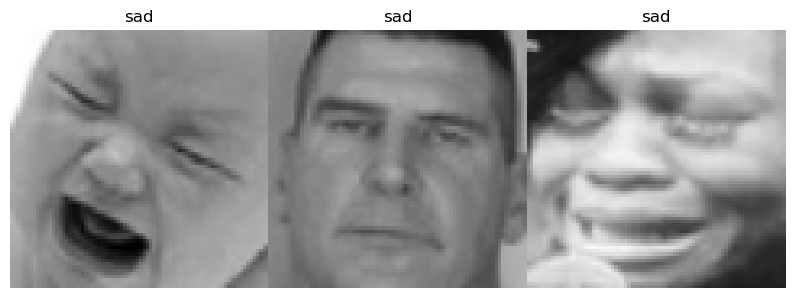

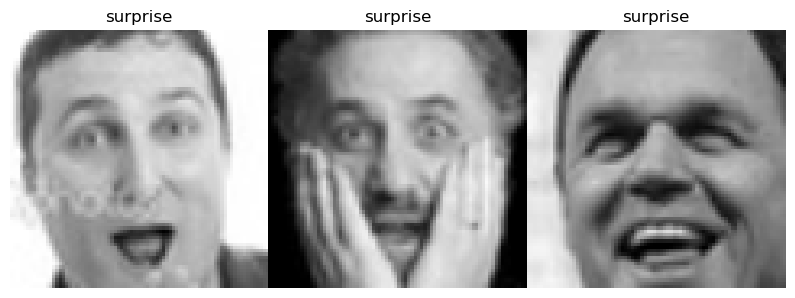

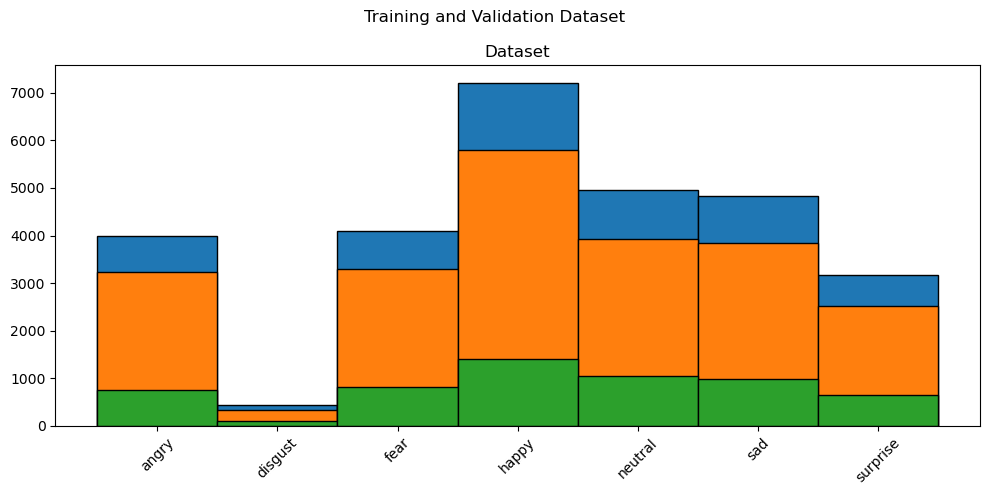

In [46]:
def load_display_data(path, batch_size=32, shape=(80, 80, 1), show_pictures=True, show_histogram=True):
    '''Takes a path, batch size, target shape for images and optionally whether to show sample images.
       Returns training and testing datasets
    '''
    print("***********************************************************************")
    print("Load data:")
    print(f"  - Loading the dataset from: {path}.")
    print(f"  - Using a batch size of: {batch_size}.")
    print(f"  - Resizing input images to: {shape}.")
    print("***********************************************************************")
    # Define the directory path
    directory_path = path
    
    # Define the batch size
    batch_size = batch_size
    
    # Define the image size using the 1st 2 elements of the shape parameter
    # We don't need the number of channels here, just the dimensions to use
    image_size = shape[:2]
    
    # Load the dataset
    X_train = tf.keras.preprocessing.image_dataset_from_directory(
        directory_path,
        batch_size=batch_size,
        image_size=image_size,
        validation_split=0.2,
        subset='training',
        seed=123,
        labels='inferred',
        label_mode='int'
    )
    
    X_val = tf.keras.preprocessing.image_dataset_from_directory(
        directory_path,
        batch_size=batch_size,
        image_size=image_size,
        validation_split=0.2,
        subset='validation',
        seed=123,
        labels='inferred',
        label_mode='int'
    )
    
    if show_pictures:
        # Get the class names
        class_names = X_train.class_names
        print(class_names)
    
        # Display up to 3 images from each of the categories
        class_images_dict = {class_name: [] for class_name in class_names}

        # Collect images for each class
        for images, labels in X_train:
            images = images.numpy()
            labels = labels.numpy()

            for i, class_name in enumerate(class_names):
                if len(class_images_dict[class_name]) < 3:
                    # Filter images of the current class
                    class_images = images[labels == i]
                    class_images_dict[class_name].extend(class_images[:3 - len(class_images_dict[class_name])])

            # Break if we have collected enough images for all classes
            if all(len(imgs) >= 3 for imgs in class_images_dict.values()):
                break

        # Display the collected images
        for class_name, class_images in class_images_dict.items():
            fig, axs = plt.subplots(1, 3, figsize=(10, 10))
            fig.subplots_adjust(wspace=0, hspace=30)  # Adjust the space between subplots

            for j in range(len(class_images)):
                ax = axs[j]
                ax.imshow(class_images[j].astype("uint8"))
                ax.set_title(class_name)
                ax.axis("off")
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                ax.set_aspect('equal')
            
            plt.show()

    if show_histogram:
        # Collect all labels for training and validation datasets
        train_labels = []
        for images, labels in X_train:
            train_labels.extend(labels.numpy())

        val_labels = []
        for images, labels in X_val:
            val_labels.extend(labels.numpy())

        # Display the class distribution for the entire dataset
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 3, 1)
        plt.title("Dataset")
        # Title for the total dataset
        plt.hist(train_labels+val_labels, bins=np.arange(len(class_names) + 1) - 0.5, edgecolor='black')
        plt.xticks(range(len(class_names)), labels=class_names, rotation=45)

        plt.subplot(1, 3, 2)
        plt.title("Training")
        plt.hist(train_labels, bins=np.arange(len(class_names) + 1) - 0.5, edgecolor='black')
        plt.xticks(range(len(class_names)), labels=class_names, rotation=45)

        plt.subplot(1, 3, 3)
        plt.title("Validation")
        plt.hist(val_labels, bins=np.arange(len(class_names) + 1) - 0.5, edgecolor='black')
        plt.xticks(range(len(class_names)), labels=class_names, rotation=45)

        plt.tight_layout()
        plt.show()

    return X_train, X_val

data_path = 'data/emotion_images/train'

X_train, X_val = load_display_data(data_path, batch_size=32, shape=(80, 80, 1), show_pictures=True, show_histogram=True)